<a href="https://colab.research.google.com/github/hrk022/Pneumonia-Detection/blob/main/X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:57<00:00, 43.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import os
dataset_path = os.path.join(path, "chest_xray")
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")
val_dir = os.path.join(dataset_path, "val")

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # ✅ Correct
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 5216 images belonging to 2 classes.


In [ ]:
# Ensure val_dir is still the path to the validation directory
val_generator = val_datagen.flow_from_directory(
    val_dir,  # ✅ Correct, but make sure it wasn't overwritten
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)
test_generator = test_datagen.flow_from_directory(
    test_dir,  # ✅ Correct, but make sure it wasn't overwritten
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # ✅ More Dropout for Regularization

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# ✅ Training the Model (Fixed)
history = model.fit(train_generator, epochs=15, validation_data=val_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7638 - loss: 0.6529

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 563s 3s/step - accuracy: 0.7639 - loss: 0.6520 - val_accuracy: 0.5000 - val_loss: 8.8424
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.8063 - loss: 0.3653 - val_accuracy: 0.5000 - val_loss: 14.3693
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.8305 - loss: 0.3326 - val_accuracy: 0.5000 - val_loss: 10.1170
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.8483 - loss: 0.3233 - val_accuracy: 0.5000 - val_loss: 6.6150
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.8483 - loss: 0.3254 - val_accuracy: 0.5000 - val_loss: 7.0084
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.8659 - loss: 0.3020 - val_accuracy: 0.6250 - val_loss: 3.3791
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.8760 - loss: 0.2855 - val_accuracy: 0.6250 - val_loss: 1.9446
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.8733 - loss: 0.2772 - val_accuracy: 0.5

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,052,993 (11.65 MB)

 Trainable params: 3,052,033 (11.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history = model.fit(train_generator,epochs=15,validation_data=val_generator)

Epoch 1/15
 44/163 ━━━━━━━━━━━━━━━━━━━━ 6:50 3s/step - accuracy: 0.6955 - loss: 1.5746

KeyboardInterrupt: 

In [ ]:
def load(img):
  img = tf.keras.utils.load_img(img,target_size=(150,150))
  img_array = tf.keras.utils.img_to_array(img),
  img_array = img_array/255.0,
  img_array = np.expand_dims(img_array,axis=0)
  return img,img_array

In [ ]:
model.save("X-ray.h5")

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def load(img):
    img = tf.keras.utils.load_img(img, target_size=(150, 150))
    img_array = tf.keras.utils.img_to_array(img)  # Remove trailing comma
    img_array = img_array / 255.0  # Remove trailing comma
    img_array = np.expand_dims(img_array, axis=0)  # Remove trailing comma
    return img, img_array

def predict(img_path):
    img, img_array = load(img_path)  # load function is now accessible
    prediction = model.predict(img_array)
    plt.imshow(img)
    plt.show()  # Remove redundant plt.show(img)
    plt.axis("off")

    if prediction[0][0] > 0.5:
        label = "detected"
    else:
        label = "normal"

    plt.title(f"Predicted: {label}")
    plt.show()

    print(f"Model Prediction: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


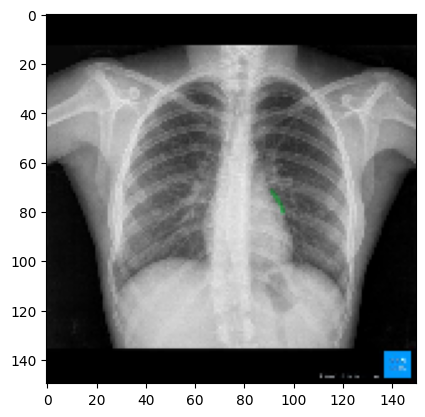

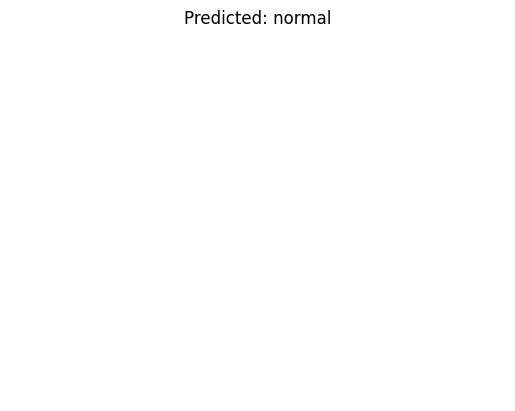

Model Prediction: normal


In [ ]:
predict("no.jpeg")